![Logo](https://github.com/Columbia-Neuropythonistas/IntroPythonForNeuroscientists2023/assets/65978061/138766b5-ac36-4dc8-b9d4-bf512ecebe78)

# **Week 9: Machine learning and navigating codebases**

In [1]:
#remember that when we use 'as', we are simply telling Python what term we want to refer to our imported packages by
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## Problem 1: Finding the dataset

We are going to analyse data collected in [High-dimensional geometry of population responses in visual cortex](https://www.nature.com/articles/s41586-019-1346-5).

1. Try to find where the data is available (hint: Nature and many other journals have a "Data availability" section).
2. There are many different files stored in the repository. We want to download the data recorded in mouse "M170717" on August 25, 2017. To figure out how the files are stored, consult the instructions on [Github repository](https://github.com/MouseLand/stringer-pachitariu-et-al-2018b). (**Important:** Make sure you download the neural recordings, not the stimulus set!)

## Getting to know the dataset

I've already prepared a numpy array containing the specific responses. Below we're loading it into the notebook:

In [2]:
recording = np.load('recording.npy')

How is this array structured?

In [3]:
recording.shape

(480, 11523)

It contains the responses of 11,523 neurons to 480 stimuli.

## Problem 2

To get some idea of the data, let's plot a histogram of the first neuron's responses across all presented images. At this point, we just quickly want to get an idea for the format of the data. Since it is a numpy array, matplotlib is perfect for this.

This data is extremely high-dimensional and so it is difficult to get a good idea of structures within this data simply from examining it. **Machine learning** makes this general problem tractable.

## Introduction to Machine learning

In science, we routinely break a vague question ("How does the brain represent orientation?") down into more specific components ("How do neurons in visual cortex respond to oriented gratings?") and then settle on a particular methodology to answer the concrete questions (e.g. record calcium traces using 2-photon imaging).

Machine learning is no different. In our case, our vague question is "What is the structure of our data?". One concrete way of asking this question is to ask about lower-dimensional structures. Our brain does this automatically all the time! In fact, consider oriented gratings:

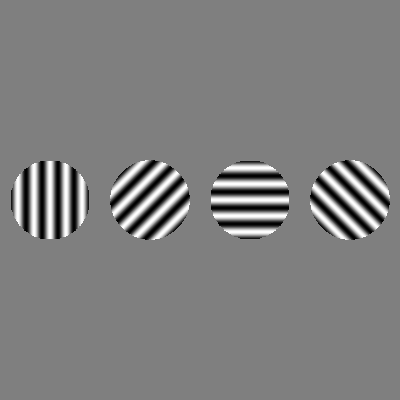

This is an extremely high-dimensional stimulus with many different pixels (i.e. dimensions). However, we break it down into a few factors of variation, e.g. orientation and frequency. Methods to uncover such underlying factors of variation are called **dimensionality reduction**.

We therefore operationalize "What is the structure of the data?" by looking at dimensionality reduction. There are many different possible ways of performing dimensionality reduction. One important such method is **Principal Component Analysis (PCA)**.

Below is a simple example:

In [4]:
x = np.random.multivariate_normal(mean=np.array([0., 0.]), cov=np.array([[1., 0.9], [0.9, 1.]]), size=(100,))

This data is two-dimensional:

In [5]:
x.shape

(100, 2)

If we look at each dimension, we don't really understand how the different variables are related:

(array([ 5.,  5., 10., 13., 18., 20., 12.,  9.,  3.,  5.]),
 array([-2.62999094, -2.12229349, -1.61459604, -1.10689858, -0.59920113,
        -0.09150368,  0.41619377,  0.92389122,  1.43158867,  1.93928613,
         2.44698358]),
 <BarContainer object of 10 artists>)

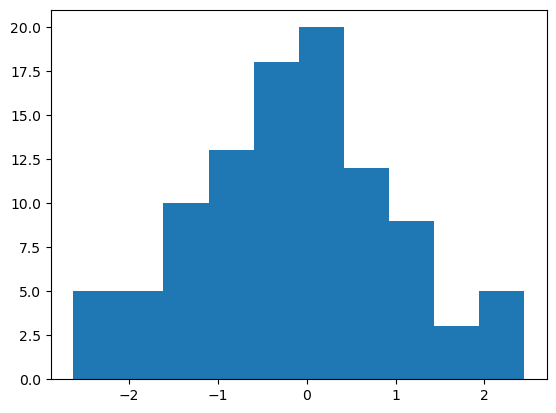

In [6]:
plt.hist(x[:,0])

(array([ 4., 10., 10., 26., 17., 11., 13.,  4.,  2.,  3.]),
 array([-2.33918187, -1.81471147, -1.29024108, -0.76577068, -0.24130028,
         0.28317012,  0.80764051,  1.33211091,  1.85658131,  2.38105171,
         2.90552211]),
 <BarContainer object of 10 artists>)

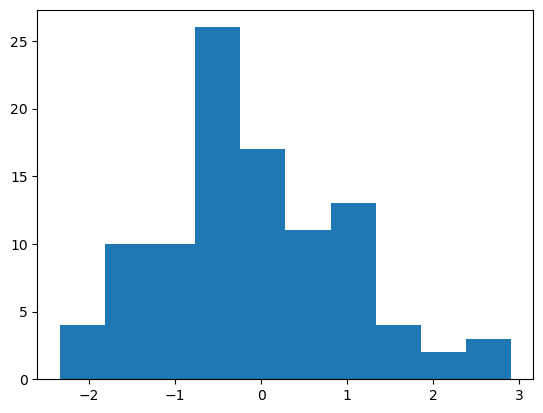

In [7]:
plt.hist(x[:,1])

However, if we plot a scatter plot, we can see some dominant components:

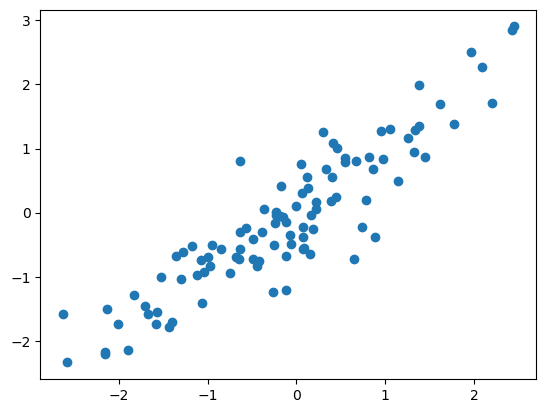

In [8]:
plt.scatter(x[:,0], x[:,1])

With two dimensions, we can do this by visual inspection. For higher-dimensional data, we need to use PCA.

How can we implement PCA in Python? To find out how a particular method is implemented in Python, we simply google it.

## Problem 3

Compute a PCA that extracts the first ten components from the neural recordings.

**Hint 1:** **Copy the code** in the examples and figure out what part of it to modify.

**Hint 2:** You often need to make sure that the data is in the format your machine learning algorithm expects. In this case, the different images are the samples and the different neurons the variables. Make sure that your data is formatted correctly!

**Hint 3:** The examples don't explain how to extract the components, just how to fit the model. Look through the attributes to identify how you get these components.

In [9]:
# Fit the PCA

In [10]:
# Extract the PCA

## Plot components

Now, let's create some plots of these components! To do so, we want to use seaborn, which uses dataframes. We therefore transform our array of components into a dataframe.

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20, whiten=True)
pca.fit(recording.T)
components = pca.components_
df_components = pd.DataFrame(components.T)

In [10]:
df_components

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.030101,0.015840,-0.048021,-0.024839,-0.080392,0.048464,0.009867,0.039908,0.056006,0.052113,0.058829,-0.016003,-0.069502,-0.005474,-0.012063,0.021463,0.001501,0.053896,-0.017089,-0.012694
1,0.038480,0.006802,-0.050434,0.048128,0.001429,0.096598,0.079098,-0.037727,0.071206,0.004111,-0.036642,-0.054151,0.007870,0.028353,-0.026970,-0.033519,0.047704,0.040572,-0.033749,0.035580
2,0.058451,0.001144,-0.037994,-0.060235,0.068519,0.146991,0.084102,0.010276,-0.064433,0.082780,0.037852,0.027907,0.138787,0.002071,0.034540,0.044502,0.075174,0.118147,-0.109411,-0.058658
3,0.045857,0.117573,0.056693,0.012179,-0.017930,0.020666,0.063065,0.073037,-0.029741,0.017761,0.053164,-0.020832,-0.035950,0.206706,0.026060,0.041209,-0.057018,0.022330,-0.091737,-0.135758
4,0.059655,-0.052693,0.067922,-0.004119,-0.046574,0.084171,0.070590,-0.082794,-0.002447,0.010064,0.026091,-0.008146,0.036346,-0.081149,0.073481,0.170842,0.077831,0.004937,0.095624,0.026696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0.018063,0.009878,-0.014739,-0.036785,-0.018146,-0.045170,0.025054,-0.020140,-0.019108,-0.022484,-0.024734,0.004369,0.014018,0.005153,-0.005798,-0.020624,0.025821,0.019403,-0.015595,0.002294
476,0.035360,-0.035641,0.038032,0.000924,0.005202,-0.032945,0.006262,-0.011237,0.030784,0.013152,0.038942,0.024355,-0.019776,-0.018936,0.099626,-0.012786,0.003845,-0.038179,-0.003687,0.024110
477,0.027097,-0.005664,-0.010562,0.024096,0.014612,-0.014500,0.000228,-0.001659,0.009261,0.018344,0.007191,0.006815,-0.009456,-0.023809,0.016735,0.021747,0.017825,-0.022805,-0.010361,-0.012843
478,0.006720,0.000504,0.000810,-0.008482,0.000406,-0.001621,-0.004694,-0.016927,0.001460,0.006376,-0.005377,-0.015946,0.009900,0.005999,-0.007910,0.000253,0.022656,0.027523,-0.006477,-0.002097


In [11]:
df_components = df_components.add_prefix('comp_')

In [12]:
df_components

,comp_0,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,comp_7,comp_8,comp_9,comp_10,comp_11,comp_12,comp_13,comp_14,comp_15,comp_16,comp_17,comp_18,comp_19
0,0.030101,0.015840,-0.048021,-0.024839,-0.080392,0.048464,0.009867,0.039908,0.056006,0.052113,0.058829,-0.016003,-0.069502,-0.005474,-0.012063,0.021463,0.001501,0.053896,-0.017089,-0.012694
1,0.038480,0.006802,-0.050434,0.048128,0.001429,0.096598,0.079098,-0.037727,0.071206,0.004111,-0.036642,-0.054151,0.007870,0.028353,-0.026970,-0.033519,0.047704,0.040572,-0.033749,0.035580
2,0.058451,0.001144,-0.037994,-0.060235,0.068519,0.146991,0.084102,0.010276,-0.064433,0.082780,0.037852,0.027907,0.138787,0.002071,0.034540,0.044502,0.075174,0.118147,-0.109411,-0.058658
3,0.045857,0.117573,0.056693,0.012179,-0.017930,0.020666,0.063065,0.073037,-0.029741,0.017761,0.053164,-0.020832,-0.035950,0.206706,0.026060,0.041209,-0.057018,0.022330,-0.091737,-0.135758
4,0.059655,-0.052693,0.067922,-0.004119,-0.046574,0.084171,0.070590,-0.082794,-0.002447,0.010064,0.026091,-0.008146,0.036346,-0.081149,0.073481,0.170842,0.077831,0.004937,0.095624,0.026696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0.018063,0.009878,-0.014739,-0.036785,-0.018146,-0.045170,0.025054,-0.020140,-0.019108,-0.022484,-0.024734,0.004369,0.014018,0.005153,-0.005798,-0.020624,0.025821,0.019403,-0.015595,0.002294
476,0.035360,-0.035641,0.038032,0.000924,0.005202,-0.032945,0.006262,-0.011237,0.030784,0.013152,0.038942,0.024355,-0.019776,-0.018936,0.099626,-0.012786,0.003845,-0.038179,-0.003687,0.024110
477,0.027097,-0.005664,-0.010562,0.024096,0.014612,-0.014500,0.000228,-0.001659,0.009261,0.018344,0.007191,0.006815,-0.009456,-0.023809,0.016735,0.021747,0.017825,-0.022805,-0.010361,-0.012843
478,0.006720,0.000504,0.000810,-0.008482,0.000406,-0.001621,-0.004694,-0.016927,0.001460,0.006376,-0.005377,-0.015946,0.009900,0.005999,-0.007910,0.000253,0.022656,0.027523,-0.006477,-0.002097


<Axes: xlabel='comp_0', ylabel='comp_1'>

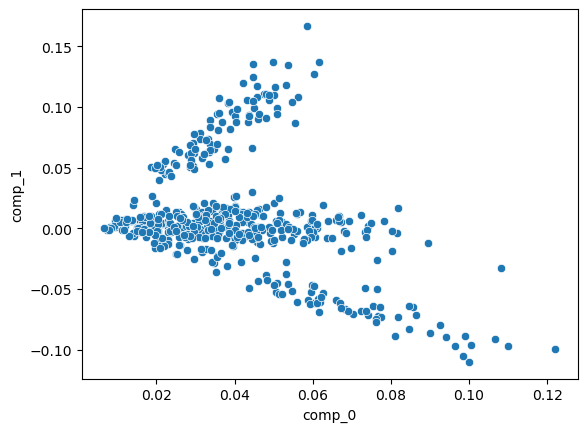

In [13]:
sns.scatterplot(data=df_components, x='comp_0', y='comp_1')

These are recordings of 5 different images! Let's see if they're represented differently.

In [14]:
img_index = np.load('img_index.npy')

In [15]:
img_index

array([1, 4, 3, 2, 5, 2, 1, 5, 3, 4, 4, 5, 1, 3, 2, 1, 3, 4, 5, 2, 4, 5,
       2, 1, 3, 1, 4, 5, 2, 3, 5, 4, 3, 2, 1, 1, 2, 3, 5, 4, 1, 4, 5, 3,
       2, 3, 4, 2, 5, 1, 3, 2, 4, 5, 1, 4, 5, 1, 3, 2, 5, 4, 1, 2, 3, 4,
       5, 3, 2, 1, 4, 1, 3, 2, 5, 2, 3, 1, 4, 5, 2, 3, 4, 1, 5, 1, 2, 3,
       5, 4, 2, 1, 3, 4, 5, 5, 4, 3, 1, 2, 5, 1, 2, 3, 4, 2, 3, 4, 1, 5,
       5, 2, 3, 1, 4, 2, 4, 3, 1, 5, 4, 1, 2, 5, 3, 3, 2, 4, 5, 1, 2, 5,
       4, 1, 3, 1, 2, 4, 5, 3, 4, 2, 5, 1, 3, 2, 5, 3, 4, 1, 5, 1, 2, 3,
       4, 1, 3, 2, 5, 4, 1, 5, 3, 2, 4, 5, 4, 1, 2, 3, 1, 3, 2, 5, 4, 5,
       3, 1, 4, 2, 1, 2, 4, 3, 5, 5, 3, 1, 4, 2, 4, 5, 3, 2, 1, 3, 5, 2,
       1, 4, 1, 5, 3, 2, 4, 1, 4, 2, 5, 3, 4, 3, 1, 2, 5, 2, 1, 3, 5, 4,
       5, 1, 2, 3, 4, 1, 2, 3, 5, 4, 4, 2, 5, 3, 1, 1, 4, 3, 5, 2, 5, 1,
       2, 3, 4, 1, 2, 5, 4, 3, 5, 4, 1, 3, 2, 5, 1, 3, 2, 4, 5, 4, 1, 2,
       3, 4, 2, 5, 1, 3, 2, 1, 5, 4, 3, 2, 3, 4, 1, 5, 5, 4, 2, 1, 3, 1,
       2, 3, 5, 4, 5, 1, 2, 3, 4, 4, 2, 3, 5, 1, 2,

In [16]:
df_components['img_index'] = img_index.astype(str)

In [17]:
df_components

,comp_0,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,comp_7,comp_8,comp_9,...,comp_11,comp_12,comp_13,comp_14,comp_15,comp_16,comp_17,comp_18,comp_19,img_index
0,0.030101,0.015840,-0.048021,-0.024839,-0.080392,0.048464,0.009867,0.039908,0.056006,0.052113,...,-0.016003,-0.069502,-0.005474,-0.012063,0.021463,0.001501,0.053896,-0.017089,-0.012694,1
1,0.038480,0.006802,-0.050434,0.048128,0.001429,0.096598,0.079098,-0.037727,0.071206,0.004111,...,-0.054151,0.007870,0.028353,-0.026970,-0.033519,0.047704,0.040572,-0.033749,0.035580,4
2,0.058451,0.001144,-0.037994,-0.060235,0.068519,0.146991,0.084102,0.010276,-0.064433,0.082780,...,0.027907,0.138787,0.002071,0.034540,0.044502,0.075174,0.118147,-0.109411,-0.058658,3
3,0.045857,0.117573,0.056693,0.012179,-0.017930,0.020666,0.063065,0.073037,-0.029741,0.017761,...,-0.020832,-0.035950,0.206706,0.026060,0.041209,-0.057018,0.022330,-0.091737,-0.135758,2
4,0.059655,-0.052693,0.067922,-0.004119,-0.046574,0.084171,0.070590,-0.082794,-0.002447,0.010064,...,-0.008146,0.036346,-0.081149,0.073481,0.170842,0.077831,0.004937,0.095624,0.026696,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0.018063,0.009878,-0.014739,-0.036785,-0.018146,-0.045170,0.025054,-0.020140,-0.019108,-0.022484,...,0.004369,0.014018,0.005153,-0.005798,-0.020624,0.025821,0.019403,-0.015595,0.002294,1
476,0.035360,-0.035641,0.038032,0.000924,0.005202,-0.032945,0.006262,-0.011237,0.030784,0.013152,...,0.024355,-0.019776,-0.018936,0.099626,-0.012786,0.003845,-0.038179,-0.003687,0.024110,5
477,0.027097,-0.005664,-0.010562,0.024096,0.014612,-0.014500,0.000228,-0.001659,0.009261,0.018344,...,0.006815,-0.009456,-0.023809,0.016735,0.021747,0.017825,-0.022805,-0.010361,-0.012843,4
478,0.006720,0.000504,0.000810,-0.008482,0.000406,-0.001621,-0.004694,-0.016927,0.001460,0.006376,...,-0.015946,0.009900,0.005999,-0.007910,0.000253,0.022656,0.027523,-0.006477,-0.002097,3


<Axes: xlabel='comp_0', ylabel='comp_1'>

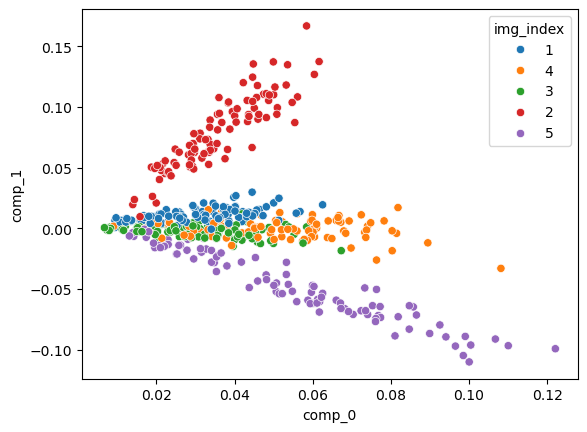

In [18]:
sns.scatterplot(data=df_components, x='comp_0', y='comp_1', hue='img_index')

## Support vector machines
(class didn't get to this)
How differently do the recordings represent repeated presentations of different images? One way of answering this question is by trying to predict which image each data point is representing.

<Axes: xlabel='comp_0', ylabel='comp_1'>

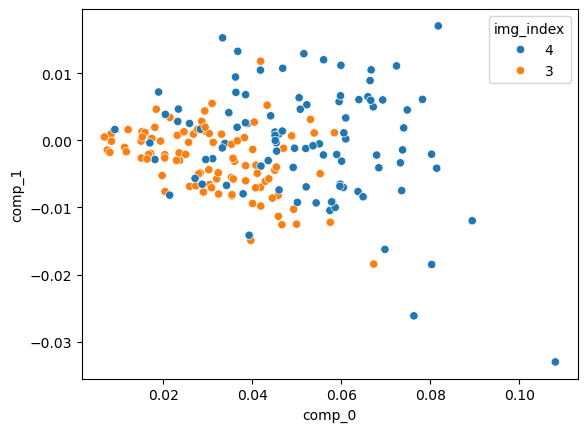

In [19]:
sns.scatterplot(data=df_components[np.isin(df_components['img_index'], ['3', '4'])], x='comp_0', y='comp_1', hue='img_index')

One method for doing so is a support vector machine, which tries to draw a line that separates the two classes.

## Problem 4: Support vector machine

(class didn't get to this)

Build a support vector machine that tries to predict whether a particular response represents image 1 or 2. Below we're extracting the responses to those two images:

In [20]:
components_subset = components[:,np.isin(df_components['img_index'], ['3', '4'])]
img_index_subset = df_components['img_index'][np.isin(df_components['img_index'], ['3', '4'])]

In [21]:
train_x = components_subset[:,:150]
train_y = img_index_subset[:150]
test_x = components_subset[:,150:]
test_y = img_index_subset[150:]

As before, try to find the help page for support vector machines. You should use the class `SVC` and use a linear kernel. Copy the relevant code and try to change the important parts to it. Again, make sure that your data is in the right shape and transpose the arrays if necessary. After fitting, try to compute the accuracy of your model on the test data.

**Hint:** The help page uses a pipeline (a concept we haven't gotten to in class). You can copy the entire pipeline.

In [25]:
# Fit the SVM

In [26]:
# Compute its accuracy on the test set

## Model assumptions

Just like with any other scientific method, the assumptions underlying a particular machine learning method may not always be inappropriate (and indeed always have their drawbacks). It is therefore important to be aware of those drawbacks and even try out a few different methods to make sure whether your findings are vulnerable to a particular methodology.

## Interrogating our dataset

What other questions might we have about our dataset? In the time we have left, let's try and pick apart this dataset.